# 利用python做数据分析读书笔记
## 参考资料
书籍:利用python做数据分析
[numpy中文文档](http://python.usyiyi.cn/translate/NumPy_v111/index.html)

## Numpy简介
* 快速高效的多维数组对象ndarray
## Panda简介
* 快速便捷地处理结构化数据的大量数据结构和函数

## Matpoltlib简介
用于挥之数据图表的python库

## Ipython
增强的python shell

## Scipy简介
一组专门解决科学计算中各种标准问题域的包的集合
* scipy.integrate 数值积分例程和微分方程求解器
* scipy.linalg 扩展了由numpy.linalg提供的线性代数例程和矩阵分解功能
* scipy.optimize 函数优化器（最小优化器）以及根查找算法
* scipy.signal 信号处理工具
* scipy.sparse 稀疏矩阵和稀疏线性系统求解器
* scipy.special 实现了许多常用数学函数的包装器
* scipy.stats 标准连续和离散概率分布、各种统计检验方法，以及更好的描述统计法
* scipy.weave 利用内联C++代码加速数组计算的工具

## 习惯做法
import matplotlib.pyplot as plt

# Ipython

1. 在变量之后加一个问号——内省，可以显示该对象的通用信息，？？可以显示函数的源代码，还可以搜索函数，`np.*load*?`
2. `%run`命令来运行脚本，如果希望脚本可以访问IPython命名空间中的变量，用`%run -i`命令
3. 使用`%paste`和`%cpaste`来承载剪贴板中的文本，并在shell中以整体的方式运行，建议使用后者，更方便
4. 键盘快捷键Ctrl+
    * P 上
    * N 下
    * A 移动到行首
    * E 移动到行尾
    * K 删除光标到行尾
    * U 删除光标到行首
    * F forward
    * B back
5. 魔术命令：魔术命令默认是可以不加%的，可以通过%automagic打开或者关闭这个功能，建议都加上%吧
    * %timeit + 语句 检测python语句执行时间（平均执行时间，对于小的语句
    * %time 检测执行时间
    * %quickref
    * %magic 查看magic文档
    * %debug
    * %hist 打印的输出历史
    * %pdb 在异常发生后自动进入调试器
    * %paste 和 %cpaste
    * %reset 删除interactive命名空间中的全部变量
    * %page OBJECT 通过分页器打印出OBJECT
    * %run
    * %who %whos %who_ls
    * %xdel variable
    * %%python2 运行python2代码
6. ipython集成matplotlib——`ipython --pylab`就能够实现可视化
7. 历史输出和历史变量，`_` 和 `__`分别记录前一个和前前个输出结果，`_`+number可以访问第number的输出变量，`_`+i+number则是输入变量
8. 记录输入和输出： %logstart
9. 与系统相关的Ipython魔术命令
    * !cmd
    * output = !cmd args
    * %alias alias_name cmd
    * %cd directory
    * %pwd
    * %pushd directory
    * %dirs
    * %popd 弹出栈顶队列，并转向该目录
    * %dhist 打印目录访问历史
    * %env 以dict形式返回系统环境变量
10. 别名：`%alias ll ls`不过这个只在当前的Ipython环境中有效，创建永久别名需要在shell下键入命令
11. 目录书签系统——书签会被自动持久化，而不像alias
    * %bookmark myproj /home/jackie/proj 定义书签
    * cd myproj
    * %bookmark -l
12. 交互式调试器
    * %debug 在错误发生之后马上输入debug会调用‘事后’调试器，并直接跳转到引发异常的那个栈帧stack frame
    * %pdb 可以让ipython在出现异常后自动调用调试器
13. 调试（TODO，这个地方有点懵逼，暂时学习到这里）——调试命令
    * h(help) [command]
    * c(continue)
    * q(quit)
    * b(break) number 
    * b path/to/file.py:number 设置断点
    * s(step)
    * n(next)
    * u(up)/d(down) 在函数调用栈中向前向后移动（TODO不清楚什么意思）
    * a(args)
    * debug statement
    * l(list) statement
    * w(where)

# Numpy基础：数组和矢量计算

In [8]:
import numpy as np

data1 = [[1,2,3],[4,5,6]]
arr1 = np.array(data1, dtype=np.float64) 
print('arr1: \n', arr1)
print(np.eye(5,4))
np.identity(5)

arr1: 
 [[1. 2. 3.]
 [4. 5. 6.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]


array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 一、ndarray数组
1. Numpy数组函数
    * np.zeros & ones & empty & eye & identity 
    * np.arange
    * arr = arr.astype(np.int32)  #转换数值类型
2. ndarray特点
    * 矢量化：矢量化vectorizaiton后的数组之间的任何运算都会应用到元素级
    * 注意点：ndarray的数组切片是原始数组的的视图，任何对切片的修改都会反应到原始数组上
    * 显式复制的方法 arr = arr_name[5:8].copy()
    * 索引：arr2[0][2] 等价于 arr2[0, 2]，如果取二维数组的某几行要这么写arr[[4,3,0,6]]
    * ndarray也可以存储字符串和bool类型
3. 查看ndarray属性
    * arr.dtype
    * arr.shape
    * arr.ndim
4. ndarray切片
    * arr[:2] 取两个值
    * arr[a,b] 取从a开始的b-a个值，即a,a+1,...,b-1
    * 需要看例子熟练掌握
5. random模块(like from numpy.random import randn)
        * randn 正态分布的随机数据，eg randn(4,4)
6. 花式索引，花式索引跟切片不一样，它总是将数据复制到新数组中，例子见下
7. reshape，eg: `arr = np.arange(32).reshape((8,4))`然后你会得到8x4的数组
8. 数组转置transpose
    * arr.T # 如计算矩阵内积，np.dot(arr.T, arr)
    * arr.transpose #对于高维数组，接受轴编号(TODO
    * arr.swapaxes 接受一对轴编号
    

In [24]:
# 一些例子
names = np.array(['jackie', 'joy', 'tom', 'jackie', 'joy'])
names == 'jackie'
# 得到的值可以当做切片使用，这叫做bool索引，例如
# data = randn(7,4)
# data[names == 'jackie', 3]
# 组合符号为 | 或者，  & 和，但不能使用or and
# 另一个例子 data[data < 0] = 0 # 这个就使用了bool数组索引

array([ True, False, False,  True, False])

In [30]:
# 6 花式索引
arr = np.empty((8,4))
for i in range(8):
    arr[i] = i
print(arr[[4,3,0,6]]) # 这里也可以使用负数索引
print(arr[:,[1,3]])#：表示所有行，这样才能选择同一列上的所有行（同一列的所有数字）

[[4. 4. 4. 4.]
 [3. 3. 3. 3.]
 [0. 0. 0. 0.]
 [6. 6. 6. 6.]]
[[0. 0.]
 [1. 1.]
 [2. 2.]
 [3. 3.]
 [4. 4.]
 [5. 5.]
 [6. 6.]
 [7. 7.]]


## 二、其他
1. 常用通用函数ufunc列表
    * 一元函数unary
        * np.sqrt(arr) 相当于`arr ** 0.5`
        * np.square(arr) `arr ** 2`
        * np.log log10 log2 log1p log1p==log(1+x)
        * np.sign 1正数，0零，-1负数
        * np.ceil 大于该值的最小整数
        * np.floor 小于该值的最大整数
        * rint 四舍五入到整数
        * np.exp(arr) 返回e的arr次方，对应import math; math.exp(x)
        * np.abs np.fabs fabs用于非复数值，可以计算的更快
        * np.modf(x) 相当于python内置函数divmod(x,1)，取得x的整数和小数部分
            * python divmod() 函数把除数和余数运算结果结合起来，返回一个包含商和余数的元组(a // b, a % b), eg divmod(8,2) 得到(4,0)
        * np.isnan isfinite isinf 
        * cos cosh sin sinh tan tanh(TODO cos??
        * arccos arccosh arcsin arcsinh arctan arctanh (TODO
        * np.logical_not(x) 计算not x表达式的值
    * 二元函数binary
        * np.maximum fmax fmax将忽略NaN
        * np.minimum fmin
        * np.add(x, y) 等同于x+y
        * np.subtract(x, y) == x-y
        * np.multiply(x, y) == x * y
        * np.divide floor_divide
        * np.power
        * np.mod 除数的余数
        * np.copysign TODO
        * np.greater greater_equal less less_equal equal not_equal
        * np.logical_and logical_or logical_xor 相当于 & | ^
        
2. 利用数组进行数据处理
用数组表达式代替循环的做法，通常被称之为矢量化，一些常用的函数
    * np.meshgrid(arr, arr) #接受两个二维数组，并产生两个二维矩阵
    * np.where(cond, xarr, yarr) 相当于x if condition else y xy也可以是标量
3. 统计方法
下面的方法中，布尔值会变强制转换为1和0
    * np.mean sum 也可以这样调用 arr.mean() arr.sum()这类函数可以接受axis参数，即arr.mean(axis=1)
    * np.std var 标准差和方差 标准差定义 `sqrt(sum((x-e)**2))/n)` e为平均值
    * np.min max 
    * np.argmin argmax 最大值和最小值的索引
    * np.cumsum cumprod 累计和 和 累计积
    * (arr > 0).sum() 计算正值的数量
    * arr.any()是否存在正值
    * arr.all()是否全是正值
4. 排序&其他集合逻辑
    * arr.sort() 如arr.sort(1)在第二个轴，即列上面排序（左列数字小，右边列大）
    * np.unique(arr) 找出唯一值并返回已排序的结果，相当于sorted(set(arr))
    * np.in1d(values, inset) 判断values值在inset中的成员资格
    * np.intersect1d(x, y) x,y 的公共元素，返回有序结果
    * np.union1d(x, y) x,y的并集，返回有序结果
    * np.setdiff1d(x,y) 在x中而不在y
    * np.setxor1d(x,y) 存在于一个数组但不同时存在于两个数组
5. 数组的文件输入和输出
    * 以二进制格式保存到磁盘
        * np.save(filename, arr) filename如果没有.npy会默认被加上后缀
        * np.load(filename)
        * np.savez(filename, a=arr1, b=arr2) 读取时类似字典readarr['a']得到原来的arr
    * 存取文本文件
        * np.loadtxt(csvfilename, delimiter=',') CSV文件是以逗号作为分隔符和文件
        * np.savetxt是Loadtxt的相反操作
6. 线性代数
    * arrx.dot(arry) 相当于 np.dot(arrx,arry) 矩阵乘法
    * diag 返回方阵对角线元素or将一位数组转成方阵（非对角线元素为0）
    * trace 对角线元素和
    * det 计算矩阵行列式
    * eig 计算方阵的本征值和本征向量
    * inv 计算方阵的逆
    * pinv 计算矩阵的Moore-Penrose伪逆
    * qr 计算QR分解
    * svd 计算奇异值分解
    * solve 解线性方程组 Ax=b A为方阵
    * lstsq Ax=b的最小二乘解
7. 随机数生成numpy.random
    * python random 缺点是一次只能生成一个随机数[参考资料](https://www.rddoc.com/doc/Python/3.6.0/zh/library/random/)
        * random() 返回[0,1)之间的实数
        * uniform(a,b) 返回[a,b]之间的实数
        * randint(a,b) 返回整数
        * randrange(a,b,step) step 为间隔
    * numpy.random
        * 我习惯使用size来指定
        * **normal**(loc=0, scale=1.0, size=(4,4)) 调用方式np.random.normal 正态（高斯）分布
        * seed(1234) 全局seed
        * RandomState(1234) 局部seed,用法 rng = np.random.RandomState(1234); rng.randn()
        * shuffle 一个序列就地随机排列
        * permutation 返回一个序列的随机排列
        * binomial 二项分布的样本值
        * rand(d0, d1, ..., dn)	以给定的维度返回[0,1)之间的均匀分布的随机值。跟random是一样的,只不过传入参数的格式有点不同
        * **random**([size]) 在半开间隔[0.0，1.0]中返回随机浮点数。random((1000, 100)),等同于random_sample([size])
        * randn(d0, d1, ..., dn)	从“标准正态”分布($\mu=0,\sigma=1$)返回一个样本（或多个样本）。
        * **randint**(low[, high, size, dtype])	返回从low（包括）到high（不包括）的随机整数。randint(2, size=(1000, 1)) 从0到2的整数(不包括2), 等同于random_integers(low[, high, size])
        * ranf([size])	在半开间隔[0.0，1.0]中返回随机浮点数。
        * sample([size])	在半开间隔[0.0，1.0]中返回随机浮点数。
        * choice(a[, size, replace, p])	从给定的1-D数组生成随机样本
        * bytes(length)	返回随机字节。
    


[[-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 ...
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]
 [-5.  -4.9 -4.8 ...  4.7  4.8  4.9]]

[[-5.  -5.  -5.  ... -5.  -5.  -5. ]
 [-4.9 -4.9 -4.9 ... -4.9 -4.9 -4.9]
 [-4.8 -4.8 -4.8 ... -4.8 -4.8 -4.8]
 ...
 [ 4.7  4.7  4.7 ...  4.7  4.7  4.7]
 [ 4.8  4.8  4.8 ...  4.8  4.8  4.8]
 [ 4.9  4.9  4.9 ...  4.9  4.9  4.9]]


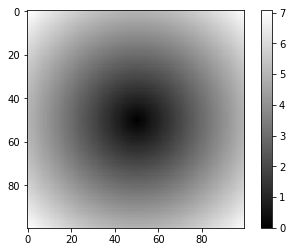

In [37]:
%matplotlib inline
points = np.arange(-5,5,0.1)
xs, ys = np.meshgrid(points, points)  #接受两个二维数组，并产生两个二维矩阵
print(xs)
print()
print(ys)
import matplotlib.pyplot as plt
z = np.sqrt(xs ** 2 + ys ** 2)
plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
#plt.title('Image plot of $\sqrt{x^2 + y^2}$ for a grid of values')

# Panda
1. Series对象
    * 创建Series方法
        * obj = Series([2,3,4,5], index=['a','b','c','d') #可以省略后面的index，默认index为0-n
        * obj = Series(dict)
        * obj = Series(dict, index=list)
    * Series方法
        * obj.values
        * obj.index
        * obj.isnull notnull来检测是否有缺失数据
        * obj.name = 'name'
        * obj.index.name = 'index'
        * obj.index = newindexlist 可以就地修改index
    * Series重要特点
        * 在算术运算中会自动对齐不同索引的数据
        * 所有空位都会被填上缺失值NaN
2. DataFrame
    * 创建DataFrame对象
        * 传入一个字典data={key1:list1,key2:list2} frame = DataFrame(data)
        * DataFrame(data, columns=list, index=list)可以指定columns,index
    * DataFrame方法
        * frame[indexname]得到一个Series,name也被相应设置好了
        * 赋值：frame[indexname] = np.arange(5.)

In [39]:
import pandas as pd
from pandas import Series, DataFrame
obj = Series([2,3,5,2])


0    2
1    3
2    5
3    2
dtype: int64

# Matplotlib
如果使用ipython 用 ipython --pylab
习惯用法
import matplotlib.pyplot as plt
1. 创建图表
    * fig = plt.figure()
    * fig, axes = plt.subplots(x, y)
    * plt.plot(data, style) # style比如'ko--'
2. 颜色标记和线型
    * ax.plot(x, y, 'g--') == ax.plot(x,y,linestyle='--', color='g')
    * 顺序: color-maker-linestyle
    * 颜色
        * 常见颜色的缩略词
        * 其他颜色指定RGB如'#CECECE'
    * Linestyle 见plot的文档
    * 标记marker以强调实际的数据点
3. 刻度、标签和图例
    * 对当前和最近创建的AxesSubplot起作用
        * plt.xlim() 范围
        * plt.xticks() + xticks([0,10])
        * plt.xticklabels
    * 对subplot起作用的方法
        * ax.get_xlim
        * ax.set_xlim
        * ax.set_title
        * ax.set_xlabel
    * 图例
        * 在plot函数中加入label='name'
        * 最后plot.legend(loc='best') loc即位置,best是自动选最好的位置
4. 注解以及在subplot上绘图
    * 添加文本
        * ax.text(x,y,'hello',family='monospace',fontsize=10) xy是位置
    * 绘图
        * 常见图形(称为块patch),在matplotlib.pyplot或matplotlib.patches中
5. 将图表保存到文件
    * plt.savefig('figpath.svg')
    * plt.savefig('figpath.png', dpi=400, bbox_inches='tight')
    * dpi 每英寸分辨率, bbox_inches可以剪掉图表周围的空白部分
    * facecolor edgecolor 背景色,默认白色
    * format 比如png, pdf svg ps eps
6. matplotlib配置
    * python编程方式配置
        * plt.rc('figure', figsize=(10,10)) 全局图像默认大小为10x10
    * 修改配置文件
        * 全部的自定义项请查阅matplotlib配置文件matplotlibrc位于
        * matplotlib/mpl-data

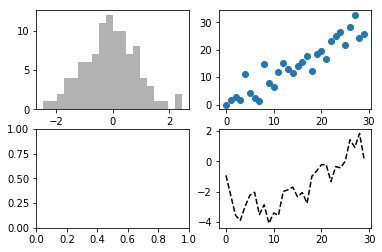

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.random import randn
import numpy as np

fig = plt.figure()
ax1 = fig.add_subplot(2,2,1)
ax2 = fig.add_subplot(2,2,2)
ax3 = fig.add_subplot(2,2,3)
ax4 = fig.add_subplot(2,2,4)

plt.plot(randn(30).cumsum(),'k--')  # k-- 黑色虚线图，默认在最后一个图中作图
ax1.hist(randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3*randn(30))

(array([ 1.,  4.,  3.,  4.,  5.,  4., 10., 15., 10.,  7., 10.,  4.,  7.,
         6.,  5.,  2.,  1.,  1.,  0.,  1.]),
 array([-2.44092136e+00, -2.16993636e+00, -1.89895137e+00, -1.62796637e+00,
        -1.35698138e+00, -1.08599638e+00, -8.15011389e-01, -5.44026394e-01,
        -2.73041399e-01, -2.05640448e-03,  2.68928590e-01,  5.39913585e-01,
         8.10898580e-01,  1.08188357e+00,  1.35286857e+00,  1.62385356e+00,
         1.89483856e+00,  2.16582355e+00,  2.43680855e+00,  2.70779354e+00,
         2.97877854e+00]),
 <a list of 20 Patch objects>)

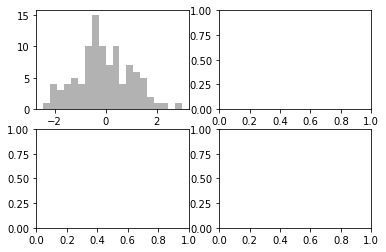

In [35]:
fig, axes = plt.subplots(2,2)
axes[0,0].hist(randn(100), bins=20, color='k', alpha=0.3)

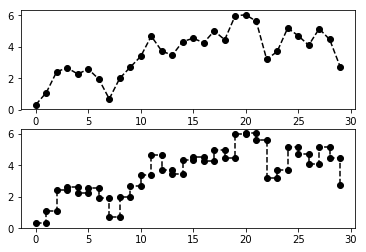

In [65]:
fig, axes = plt.subplots(2,1)
data = randn(30).cumsum()
axes[0].plot(data, 'ko--')
axes[1].plot(data, 'ko--', drawstyle='steps-post')

In [107]:
data = randn(20).cumsum()

array([ 1.27691779,  3.09811133,  4.05095115,  3.03097026,  2.96945188,
        2.35601623,  2.34576594,  3.75525069,  4.88872877,  6.15422653,
        5.12010365,  6.46331455,  8.15275707,  9.03244299,  9.8202046 ,
       12.71788471, 13.41281419, 14.92599788, 15.52719172, 15.0133035 ])

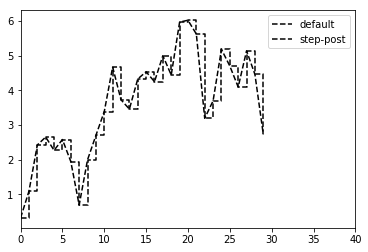

In [84]:
plt.plot(data, 'k--', label='default')
plt.plot(data, 'k--', drawstyle='steps-post', label='step-post')
plt.xlim([0,40])
plt.legend(loc='best') #用来添加图例,图片右上角的东西

([<matplotlib.axis.XTick at 0x7f9121e4c0f0>,
 <a list of 4 Text xticklabel objects>)

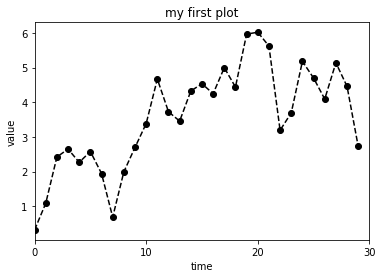

In [77]:
plt.plot(data, 'ko--')
plt.title('my first plot')
plt.xlabel('time')
plt.ylabel('value')
plt.xlim([0,30])
plt.xticks([x for x in range(0,31,10)])
#plt.xticklabels(['one','two','three'], rotation=30, fontsize='small')

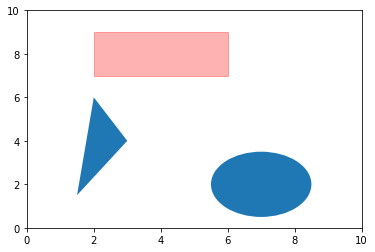

In [102]:
# 创建块patch对象
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

rect = plt.Rectangle((2,7), 4, 2, color='r', alpha=0.3)
circ = plt.Circle((7,2), 1.5)
pgon = plt.Polygon([[1.5, 1.5], [3,4], [2,6]])
# alpha是用来调整灰度值,第一个值是中心位置,第2,3分别是长和高

ax.set_xlim([0,10]) # 默认是0到1
ax.set_ylim([0,10])

ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)
plt.savefig('myplot.svg')
plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

In [103]:
# matplotlib 配置
'''
font_options = {'family' : 'monospace',
               'weight' : 'bold',
               'size' : 'small'}
plt.rc('font', **font_options)
'''

"\nfont_options = {'family' : 'monospace',\n               'weight' : 'bold',\n               'size' : 'small'}\nplt.rc('font', **font_options)\n"

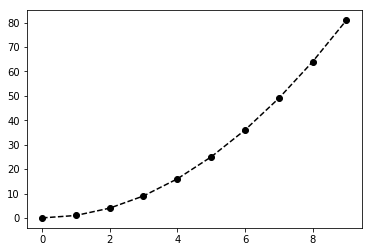

In [106]:
x = [i for i in range(10)]
y = [i ** 2 for i in range(10)]
plt.plot(x, y, 'ko--')

# Pandas绘图
TODO 书还没有看全

# 进阶绘图
TODO

# 时间序列
1. 关于时间的模块
    * time
    * datatime
    * calendar
2. datetime
    * 以毫秒存储时间
    * 求时间差的方法,datatime相减得到datatime.timedelta对象,可以通过它的属性值days和seconds查看
    * data 存储年月日
    * time 存储时分秒毫秒
3. 更多TODO(很有用的,记得回来复习)

In [113]:
# 关于datetime的例子
from datetime import datetime
now = datetime.now()
print(now)
print(now.year, now.month, now.day)

2018-02-03 16:24:56.279280


(2018, 2, 3)

In [116]:
time1 = datetime(2014,1,7)
time2 = datetime(2018,2,3,16,38,10)
delta = time2 - time1
print(delta, delta.days, delta.seconds)

1488 days, 16:38:10 1488 59890


In [117]:
from datetime import timedelta
now = datetime.now()
now + timedelta(10) #这里的10是10天

datetime.datetime(2018, 2, 13, 16, 40, 51, 868106)

In [122]:
from datetime import date, time
now = date(2018,1,2)
print(now)

2018-01-02
